In [31]:
# Import de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

In [32]:
X_train = pd.read_csv("../dataset/X_training.csv")
X_train = X_train.astype(np.float32)

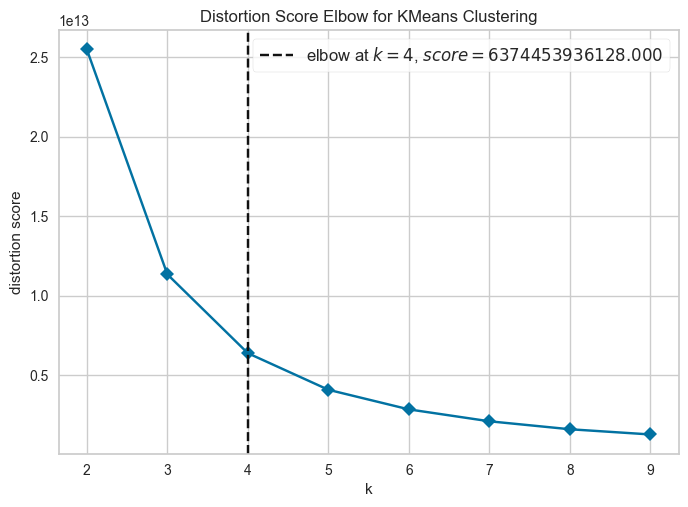

Melhor número de clusters para K-Means: 4


In [33]:
# Criar modelo K-Means para encontrar o melhor k
model = KMeans(random_state=42)

# Usar o visualizador do método do cotovelo
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X_train)

# Exibir o gráfico
visualizer.show()

# Pegar o melhor número de clusters encontrado
best_k = visualizer.elbow_value_
print(f"Melhor número de clusters para K-Means: {best_k}")

In [53]:
# Treinar K-Means com o melhor número de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_train)

In [54]:
# Amostragem Affinity Propagation
N_SAMPLES = min(len(X_train), 5000)
X_sample = X_train.sample(n=N_SAMPLES, random_state=42)

#Affinity Propagation 
affinity_propagation = AffinityPropagation(damping=0.7, preference=-1000, max_iter=300, random_state=42)
y_affinity = affinity_propagation.fit_predict(X_sample)


In [55]:
# Calculando o Silhouette Score para cada algoritmo
silhouette_kmeans = silhouette_score(X_train, y_kmeans)
silhouette_affinity = silhouette_score(X_sample, y_affinity)

# Número de Clusters
n_clusters_kmeans = best_k 
n_clusters_affinity = len(np.unique(y_affinity))  

# DataFrame com os resultados
df_resultados = pd.DataFrame({
    "Algoritmo": ["K-Means", "Affinity Propagation"],
    "Número de Clusters": [n_clusters_kmeans, n_clusters_affinity],
    "Silhouette Score": [silhouette_kmeans, silhouette_affinity]
})

df_resultados

,Algoritmo,Número de Clusters,Silhouette Score
0,K-Means,4,0.571798
1,Affinity Propagation,2057,0.569460
